# Exploratory Data Analysis on Concepts Data

## Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read concepts data

In [2]:
df = pd.read_json('/home/tewodros_cheru/concepts.json')

## Description

In [3]:
df.describe()

,concept,implementation,explanation,asset_suggestions
count,115,115,115,115
unique,99,111,103,103
top,The ad begins with a captivating image of the ...,{'frame_1': {'description': 'The ad opens with...,This concept aligns with Adludio's brand ident...,[{'frame_1': {'Background Animation': 'A suspe...
freq,5,5,5,13


## Printing rows

In [4]:
df

,concept,implementation,explanation,asset_suggestions
0,Escape Challenge Teaser,{'frame_1': {'description': 'The ad begins wit...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
1,Interactive Storytelling,{'frame_1': {'description': 'The ad opens with...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
2,City Tour,{'frame_1': {'description': 'The ad begins wit...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
3,Interactive Globe Journey,{'frame_1': {'description': 'The ad opens with...,This concept aligns with the brand's identity ...,[{'frame_1': {'3D Globe': 'A high-definition 3...
4,Cultural Carousel,{'frame_1': {'description': 'A carousel of cul...,This concept leverages the brand's diverse por...,[{'frame_1': {'Background Image': 'A high-reso...
...,...,...,...,...
110,The second concept is a virtual gaming experie...,{'frame_1': {'description': 'The first frame p...,This concept aligns with the brand's purpose o...,[{'frame_1': {'Background Image': 'A high-reso...
111,The third concept is a virtual tour of the Ste...,{'frame_1': {'description': 'The first frame p...,This concept aligns with the brand's identity ...,[{'frame_1': {'Product Image': 'A high-resolut...
112,The fifth concept is a virtual test drive. The...,{'frame_1': {'description': 'The first frame p...,This concept aligns with the brand's purpose o...,[{'frame_1': {'Background Image': 'A high-reso...
113,The Silver Challenge,{'frame_1': {'description': 'The ad begins wit...,The concept aligns with the brand's identity a...,"[{'frame_1': {'Background': 'A dark, mysteriou..."


## Printing implementation of the first row 

In [6]:
df['implementation'][0]

{'frame_1': {'description': "The ad begins with a suspenseful animation of a LEGO CITY set, with the tagline 'YOUR CITY, NO LIMITS' and a countdown timer.",
  'interaction_type': 'Tap',
  'next_frame': 'frame_2',
  'duration': '5 seconds'},
 'frame_2': {'description': "The scene transitions to a series of quick, exciting clips showcasing various challenges in the 'ULTIMATE ESCAPE CHALLENGE'.",
  'interaction_type': 'Swipe',
  'next_frame': 'frame_3',
  'duration': '10 seconds'},
 'frame_3': {'description': "The final frame reveals the LEGO CITY 2024 logo and a 'Play Now' button, inviting users to join the challenge on the LEGO website.",
  'interaction_type': 'Tap',
  'next_frame': 'end-of-advertisement',
  'duration': '5 seconds'}}

## Interaction types

In [13]:
interaction_types = set()

for implementation in df['implementation']:
    for frame in implementation:
        if 'interaction_type' in implementation[frame]:
            if implementation[frame]['interaction_type']:
                interaction_types.add(implementation[frame]['interaction_type'])

### Printing interaction types

In [14]:
interaction_types

{'Choice Selection', 'Drag and Drop', 'None', 'Swipe', 'Tap', 'Tap and Hold'}

## Printing explanation of teh first row

In [5]:
df['explanation'][0]

"This concept aligns with LEGO CITY's brand identity of providing fun and entertainment. It appeals to the target demographic's interest in games and challenges, and it achieves the campaign's objectives of enhancing audience engagement, increasing product and brand awareness, and driving traffic to the brand's website. The concept is scalable and can be adapted for various platforms and audiences. It can be executed within the given budget constraints."

## printing asset suggestion of the first row

In [6]:
df['asset_suggestions'][0]

[{'frame_1': {'Background Animation': "A suspenseful animation of a LEGO CITY set, with buildings, vehicles, and mini-figures coming to life in a dynamic, 3D environment. The animation is designed to captivate the viewer's attention and set the stage for the upcoming challenge.",
   'Tagline': "'YOUR CITY, NO LIMITS' appears in bold, vibrant letters, reinforcing the campaign's theme of boundless creativity and adventure.",
   'Countdown Timer': "A digital countdown timer, styled to resemble LEGO bricks, adds an element of suspense and anticipation, building up to the reveal of the 'ULTIMATE ESCAPE CHALLENGE'."},
  'frame_2': {'Video Clips': "A series of quick, exciting clips showcasing various challenges in the 'ULTIMATE ESCAPE CHALLENGE'. Each clip features different LEGO CITY sets and mini-figures, highlighting the diversity and expansiveness of the LEGO CITY universe.",
   'Swipe Indicator': 'A subtle, animated swipe indicator encourages viewers to interact with the ad and explore t

##  Counting occurrences of different asset categories

In [7]:
from collections import defaultdict

asset_categories = defaultdict(int)

for suggestion in df['asset_suggestions']:
    for frames in suggestion:
        for frame in frames:
            if type(frames[frame]) ==  dict:
                for index in frames[frame].keys():
                    asset_categories[index]+=1


In [8]:
asset_categories = sorted(asset_categories.items(), reverse=True, key=lambda x:x[1])

In [9]:
asset_categories

[('Background', 530),
 ('Interactive Element', 340),
 ('Logo', 287),
 ('Product Image', 251),
 ('CTA', 231),
 ('Text', 184),
 ('Headline Text', 159),
 ('Background Image', 146),
 ('Brand Logo', 117),
 ('Text Overlay', 77),
 ('Foreground', 71),
 ('Animation', 61),
 ('CTA Button', 54),
 ('Interaction', 39),
 ('Engagement Text', 37),
 ('Engagement Visual', 33),
 ('Product Close-up', 28),
 ('Tagline', 26),
 ('Swipe Indicator', 25),
 ('CTA Text', 24),
 ('Interactive Elements', 24),
 ('Overlay Text', 21),
 ('Interactive Text', 18),
 ('Product Feature Highlight', 17),
 ('Background Animation', 16),
 ('Main Character', 16),
 ('Voiceover', 15),
 ('Product', 15),
 ('Main Visual', 15),
 ('Main Product', 15),
 ('Countdown Timer', 13),
 ('Video Clips', 13),
 ('Toolbox', 13),
 ('Sound Effects', 13),
 ('Ending Scene', 13),
 ('Animated Cat', 13),
 ('Product Highlight', 12),
 ('Special Offer', 12),
 ('Adludio Logo', 12),
 ('Interactive Prompt', 12),
 ('Image Gallery', 12),
 ('Main Focus', 12),
 ('Inter

# Listing the top 10 categories based on occurrence

In [10]:
top10_asset_categories = asset_categories[:10]

for category in top10_asset_categories:
    print(category)

('Background', 530)
('Interactive Element', 340)
('Logo', 287)
('Product Image', 251)
('CTA', 231)
('Text', 184)
('Headline Text', 159)
('Background Image', 146)
('Brand Logo', 117)
('Text Overlay', 77)


## Plot of the top 10 categories

<Figure size 1000x600 with 0 Axes>

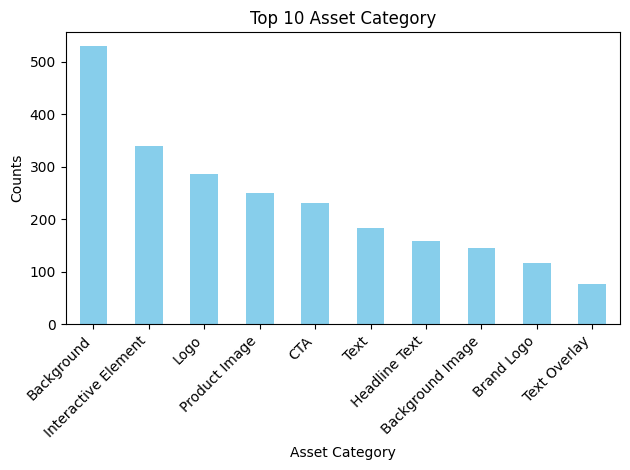

In [11]:
plt.figure(figsize=(10,6))

top_10_asset_categories = asset_categories[:10]

data = pd.DataFrame(top_10_asset_categories, columns=['Asset Category', 'Counts'])

# Plot the data
data.plot(kind='bar', x='Asset Category', y='Counts', legend=False, color='skyblue')

# Add title and labels
plt.title('Top 10 Asset Category')
plt.xlabel('Asset Category')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()